In [26]:
import numpy as np
from matplotlib import pyplot as plt
from abmn_graph_classes import *

### Equations:

\begin{equation} \tag{1}
m_i^{(t)} = \frac{a_i^{(t)}}{a_i^{(t)}+b_i^{(t)}} m_{i+1}^{(t-1)} + \frac{b_i^{(t)}}{a_i^{(t)}+b_i^{(t)}} m_{i-1}^{(t-1)} - a_i^{(t)}
\end{equation}

\begin{equation*} \tag{2}
n_i^{(t)} = \frac{a_i^{(t)}}{a_i^{(t)}+b_i^{(t)}} n_{i+1}^{(t-1)} + \frac{b_i^{(t)}}{a_i^{(t)}+b_i^{(t)}} n_{i-1}^{(t-1)} - b_i^{(t)}
\end{equation*}

\begin{equation*} \tag{3}
(a_i^{(t)} + b_i^{(t)})^2 = b_i^{(t)} (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

\begin{equation*} \tag{4}
(a_i^{(t)} + b_i^{(t)})^2 = a_i^{(t)} (n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)})
\end{equation*}

### Solving:

Strategy: at each time $t$, suppose we have $m_{i+1}^{(t-1)}$, $m_{i-1}^{(t-1)}$ and $n_{i+1}^{(t-1)}$, $n_{i-1}^{(t-1)}$. <br>
Then, first solve for $a_i^{(t)}$ and $b_i^{(t)}$ using eq (3) and eq (4). <br>
Plug into to eq (1) and eq (2) to solve for $m_{i}^{(t)}$ and $n_{i}^{(t)}$.

Equating (3) and (4):

\begin{equation*}
a_i^{(t)} (n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)}) = b_i^{(t)} (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

\begin{equation*}
a_i^{(t)} = \frac{(m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})}{(n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)})} b_i^{(t)}
\end{equation*}

\begin{equation*}
a_i^{(t)} = \frac{\Delta m}{\Delta n} b_i^{(t)}
\end{equation*}

where $\Delta m$ and $\Delta n$ are calculable constants obtained from previous timestep: 

\begin{equation*}
\Delta m = (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

\begin{equation*}
\Delta n = (n_{i-1}^{(t-1)} - n_{i+1}^{(t-1)})
\end{equation*}

Expanding (3):

\begin{equation*}
(a_i^{(t)})^2 + 2 a_i^{(t)} b_i^{(t)} + (b_i^{(t)})^2 = b_i^{(t)} (m_{i+1}^{(t-1)} - m_{i-1}^{(t-1)})
\end{equation*}

Substituting expression for $a_i^{(t)}$ in terms of $b_i^{(t)}$:

\begin{equation*}
(\frac{\Delta m}{\Delta n} b_i^{(t)})^2 + 2 (\frac{\Delta m}{\Delta n} b_i^{(t)}) b_i^{(t)} + (b_i^{(t)})^2 = b_i^{(t)} \Delta m
\end{equation*}

\begin{equation*}
(b_i^{(t)})^2 \left( \left(\frac{\Delta m}{\Delta n} \right)^2 + 2\frac{\Delta m}{\Delta n} + 1 \right) = b_i^{(t)} \Delta m
\end{equation*}

if $b_i^{(t)} \neq 0$:

\begin{equation*}
b_i^{(t)} = \frac{\Delta m}{\left( \left(\frac{\Delta m}{\Delta n} \right)^2 + 2\frac{\Delta m}{\Delta n} + 1 \right)}
\end{equation*}

\begin{equation*}
= \frac{\Delta m}{\left( \frac{\Delta m}{\Delta n} + 1 \right)^2}
\end{equation*}

which means:

\begin{equation*}
a_i^{(t)} = \frac{\Delta m}{\Delta n} \frac{\Delta m}{\left( \frac{\Delta m}{\Delta n} + 1 \right)^2}
\end{equation*}

Finally, we can plugin values of $a_i^{(t)}$ and $b_i^{(t)}$ into eq (1) and eq (2) to obtain $m_i^{(t)}$ and $n_i^{(t)}$.

### Initialization:

#### Contants:
Left end = $-k$ <br>
Right end = $l$ <br>
Payoff factor = $\lambda$ <br>

#### Positional Boundary Values:
$n_{-k}^{(t)} = 1$ -------- $n_{l}^{(t)} = 0$ <br>
$m_{-k}^{(t)} = 0$ -------- $m_{l}^{(t)} = \lambda$ <br>
for all time step $t$ <br>

#### Time Boundary Values:
$m_i^{(0)} = \frac{\lambda}{k+l}(i+k)$ <br>
$n_i^{(0)} = \frac{l-i}{k+l}$ <br>
for all positions $-k \leq i \leq l$ <br>

# Junction:

At the junction point, we must first pick a direction.

\begin{align}
v^{+} &= \arg \max_{*}(m^{(t-1)}_{*}) \tag{5} \\
v^{-} &= \arg \max_{*}(n^{(t-1)}_{*}) \notag \\
* &= \text{neighbors}(v) \notag
\end{align}

Right now, we work on the case where the graph is a single junction. This means the graph i Z from -6 to 6 with 6 more nodes coming out out the top and bottom at index 0


\begin{equation} \tag{1}
m_v^{(t)} = \frac{a_v^{(t)}}{a_v^{(t)}+b_v^{(t)}} m_{v+}^{(t-1)} + \frac{b_v^{(t)}}{a_v^{(t)}+b_v^{(t)}} m_{v-}^{(t-1)} - a_v^{(t)}
\end{equation}

\begin{equation*} \tag{2}
n_v^{(t)} = \frac{a_v^{(t)}}{a_v^{(t)}+b_v^{(t)}} n_{v+}^{(t-1)} + \frac{b_v^{(t)}}{a_v^{(t)}+b_v^{(t)}} n_{v-}^{(t-1)} - b_v^{(t)}
\end{equation*}

\begin{equation*} \tag{3}
(a_v^{(t)} + b_v^{(t)})^2 = b_v^{(t)} (m_{v+}^{(t-1)} - m_{v-}^{(t-1)})
\end{equation*}

\begin{equation*} \tag{4}
(a_v^{(t)} + b_v^{(t)})^2 = a_v^{(t)} (n_{v-}^{(t-1)} - n_{v+}^{(t-1)})
\end{equation*}

\begin{equation*}
\Delta m = (m_{v+}^{(t-1)} - m_{v-}^{(t-1)})
\end{equation*}

\begin{equation*}
\Delta n = (n_{v-}^{(t-1)} - n_{v+}^{(t-1)})
\end{equation*}

We solved this essentially before, im just going to slightly shift the code

In [22]:
def find_batteground(a, b, t, tolerance_ratio = 3):
    battleground = []

    for i in range(len(a[0])):
        for j in range(len(a[i])):
            m = max(a[t][i][j] , b[t][i][j])
            n = min(a[t][i][j] , b[t][i][j])
            ratio = m / n if n != 0 else float('inf')
            if ratio < tolerance_ratio:
                print(ratio)
                battleground.append((i,j))

    return battleground

# How to use OriginCrossGraphSolver

In [28]:
from abmn_graph_classes import *
cross = OriginCrossGraphSolver(left=6,
                         right=6,
                         top=6,
                         bottom=6,
                         time_steps=10,
                         horizontal_maxi_reward=1,
                         horizontal_mina_reward=0.99,
                         vertical_maxi_reward=1,
                         vertical_mina_reward=1)

In [ ]:
cross.solve(debug=True)

# How to use MatrixGraphSolver:
1. Create two np.ndarray of the wanted size populated with np.inf, m_map and n_map
2. Draw the path with -np.inf
3. Set the boundary conditions
4. Get the boundary coordinates
5. Initialize the values
6. Pass the maps and the boundary coordinates to MatrixGraphSolver

# Some observations:

- If maxine and mina want to move in the same direction because of how m, n are initialized, v_plus = v_minus, and delta_m = delta_n = 0, hence nana.

In [ ]:

mat = np.full((6, 6), -np.inf)
n_map = mat.copy()
n_map[0, 0] = 10
n_map[5, 5] = 0
bounds = get_bounds(n_map)
n_map = interp_n_matrix(n_map)
print(n_map)
#n_map = uniform_random(n_map)

m_map = mat.copy()
m_map[0, 0] = 0
m_map[5, 5] = 12
m_map = interp_m_matrix(m_map)
print(m_map)
#m_map = uniform_random(m_map)
solver = MatrixGraphSolver(n_map=n_map,
                           m_map=m_map,
                           time_steps=10,
                           boundary_coords=bounds
                           )
solver.solve(debug=True)


In [84]:
from abmn_graph_classes import MatrixGraphSolver
from functions import *
import numpy as np

mat = np.full((7,7), -np.inf)
n_map = mat.copy()
n_map[0, 0] = 9.97
n_map[6, 6] = 0
bounds = get_bounds(n_map)
n_map = interp_n_matrix(n_map)
#n_map = uniform_random(n_map)
#print(n_map)


m_map = mat.copy()
m_map[0, 0] = 0
m_map[6, 6] = 10.03
m_map = interp_m_matrix(m_map)
#m_map = uniform_random(m_map)
#print(m_map)

solver = MatrixGraphSolver(n_map=n_map,
                        m_map=m_map,
                        time_steps=500,
                        boundary_coords=bounds
                        )


10.03


In [85]:
solver.solve(debug=False)
#solver.m[499]

/Users/adamousherovitch/GamesResearch/random-turn-games/solvers/abmn_graph_classes.py:252: RuntimeWarning: invalid value encountered in scalar divide
  maxi_wager_ratio = self.a[t, i, j] / \
/Users/adamousherovitch/GamesResearch/random-turn-games/solvers/abmn_graph_classes.py:254: RuntimeWarning: invalid value encountered in scalar divide
  mina_wager_ratio = self.b[t, i, j] / \
/Users/adamousherovitch/GamesResearch/random-turn-games/solvers/abmn_graph_classes.py:248: RuntimeWarning: divide by zero encountered in scalar divide
  self.b[t, i, j] = delta_m / (delta_m / delta_n + 1) \
/Users/adamousherovitch/GamesResearch/random-turn-games/solvers/abmn_graph_classes.py:249: RuntimeWarning: divide by zero encountered in scalar divide
  / (delta_m / delta_n + 1)
/Users/adamousherovitch/GamesResearch/random-turn-games/solvers/abmn_graph_classes.py:250: RuntimeWarning: divide by zero encountered in scalar divide
  self.a[t, i, j] = (delta_m / delta_n) * self.b[t, i, j]
/Users/adamousherovitch

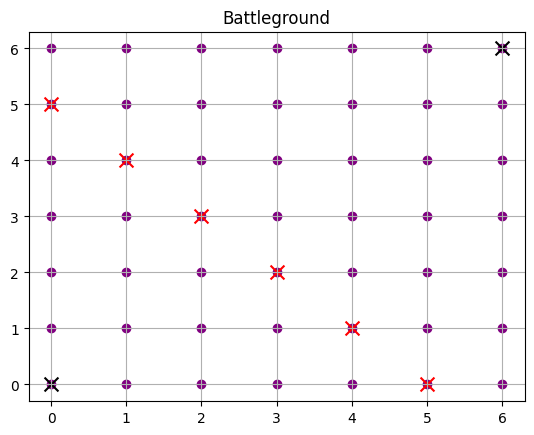

In [86]:
import matplotlib.pyplot as plt

coords = solver.find_batteground(499)
plt.scatter(*zip(*[(i, j) for i in range(mat.shape[0]) for j in range(mat.shape[1])]), c='purple')
plt.scatter(*zip(*coords), c='red', marker='x', s=100)
plt.scatter(*zip(*bounds), c='black', marker='x', s=100)
plt.title('Battleground')
plt.grid(True)
plt.show()




